# **WATER POTABILITY PREDICTION USING ML**

# WATER POTABILITY

The water_potability.csv file contains water quality metrics for 3276 different water bodies.

1. pH value:
PH is an important parameter in evaluating the acid–base balance of water. It is also the indicator of acidic or alkaline condition of water status. WHO has recommended maximum permissible limit of pH from 6.5 to 8.5. The current investigation ranges were 6.52–6.83 which are in the range of WHO standards.

2. Hardness:
Hardness is mainly caused by calcium and magnesium salts. These salts are dissolved from geologic deposits through which water travels. The length of time water is in contact with hardness producing material helps determine how much hardness there is in raw water. Hardness was originally defined as the capacity of water to precipitate soap caused by Calcium and Magnesium.

3. Solids (Total dissolved solids - TDS):
Water has the ability to dissolve a wide range of inorganic and some organic minerals or salts such as potassium, calcium, sodium, bicarbonates, chlorides, magnesium, sulfates etc. These minerals produced un-wanted taste and diluted color in appearance of water. This is the important parameter for the use of water. The water with high TDS value indicates that water is highly mineralized. Desirable limit for TDS is 500 mg/l and maximum limit is 1000 mg/l which prescribed for drinking purpose.

4. Chloramines:
Chlorine and chloramine are the major disinfectants used in public water systems. Chloramines are most commonly formed when ammonia is added to chlorine to treat drinking water. Chlorine levels up to 4 milligrams per liter (mg/L or 4 parts per million (ppm)) are considered safe in drinking water.

5. Sulfate:
Sulfates are naturally occurring substances that are found in minerals, soil, and rocks. They are present in ambient air, groundwater, plants, and food. The principal commercial use of sulfate is in the chemical industry. Sulfate concentration in seawater is about 2,700 milligrams per liter (mg/L). It ranges from 3 to 30 mg/L in most freshwater supplies, although much higher concentrations (1000 mg/L) are found in some geographic locations.

6. Conductivity:
Pure water is not a good conductor of electric current rather’s a good insulator. Increase in ions concentration enhances the electrical conductivity of water. Generally, the amount of dissolved solids in water determines the electrical conductivity. Electrical conductivity (EC) actually measures the ionic process of a solution that enables it to transmit current. According to WHO standards, EC value should not exceeded 400 μS/cm.

7. Organic_carbon:
Total Organic Carbon (TOC) in source waters comes from decaying natural organic matter (NOM) as well as synthetic sources. TOC is a measure of the total amount of carbon in organic compounds in pure water. According to US EPA < 2 mg/L as TOC in treated / drinking water, and < 4 mg/Lit in source water which is use for treatment.

8. Trihalomethanes:
THMs are chemicals which may be found in water treated with chlorine. The concentration of THMs in drinking water varies according to the level of organic material in the water, the amount of chlorine required to treat the water, and the temperature of the water that is being treated. THM levels up to 80 ppm is considered safe in drinking water.

9. Turbidity:
The turbidity of water depends on the quantity of solid matter present in the suspended state. It is a measure of light emitting properties of water and the test is used to indicate the quality of waste discharge with respect to colloidal matter. The mean turbidity value obtained for Wondo Genet Campus (0.98 NTU) is lower than the WHO recommended value of 5.00 NTU.

10. Potability:
Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable.


## IMPORTING THE LIBRARIES

In [33]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#inline: because it displays the plot in the notebook itself, immediately below the cell that creates the plot
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Importing the dataset

In [34]:
#to load the data
df=pd.read_csv("/content/water_potability.csv")

In [35]:
dff=df.copy()#creating a duplicate copy to have the original data

### Viewing what is in the data

In [68]:
pd.set_option("display.max.columns", None) #o make sure pandas doesn’t hide any columns
df.head() # to get the top 5 rows of the data

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0  7.037000  204.890455  20791.318981     7.300212  368.516441    564.308654   
2  8.099124  224.236259  19909.541732     9.275884  333.074000    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   
5  5.584087  188.313324  28748.687739     7.544869  326.678363    280.467916   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0  
5        8.399735        54.917862   2.559708           0

In [37]:
df.tail() # to get the bottom 5 rows of the data

ph    Hardness        Solids  Chloramines     Sulfate  \
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362         NaN   
3273  9.419510  175.762646  33155.578218     7.350233         NaN   
3274  5.126763  230.603758  11983.869376     6.303357         NaN   
3275  7.874671  195.102299  17404.177061     7.509306         NaN   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
3271    526.424171       13.894419        66.687695   4.435821           1  
3272    392.449580       19.903225              NaN   2.798243           1  
3273    432.044783       11.039070        69.845400   3.298875           1  
3274    402.883113       11.168946        77.488213   4.708658           1  
3275    327.459760       16.140368        78.698446   2.309149           1

## EXPLORATORY DATA ANALYSIS (EDA)

In [38]:
#to find the number of rows & columns of the data
df.shape

(3276, 10)

In [39]:
#Returns dimension of dataframe
df.ndim

2

In [40]:
#to get the non-null vlaues, type of data, memory allocated, number of columns & rows,
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


### To get the statistical information of the data

In [41]:
#to get the statistical information of the data (we get infromation for numeric data)
df.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        55.844536     3.439711     0.000000  
50%      421.884968       14.218338        66.622485     3.955028     0.000000  
75%      481.792304       16.557652        77.337473     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

In [42]:
#to get the Statistical informantion for categorical values also
df.describe(include='all')

ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        55.844536     3.439711     0.000000  
50%      421.884968       14.218338        66.622485     3.955028     0.000000  
75%      481.792304       16.557652        77.337473     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

### To find the data types in the data

In [43]:
# To know the Datatypes of each column
df.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

In [44]:
#To get the count of the data types in the data
df.dtypes.value_counts()

float64    9
int64      1
dtype: int64

### Duplicate Values

In [45]:
#Find the duplicates in the entire data
df.duplicated().sum()

0

There are no duplicate vaues in the given data set.


#### If there are duplicates
If there are dupicate values then we must  remove the duplicate entities.

df.drop_duplicates(inplace=True)

To remove the duplicates permanently we must use inplace=True

### Unique values 

In [46]:
#Gives the count(or the number) of unique entries/ values present in each columns
df.nunique()

ph                 2785
Hardness           3276
Solids             3276
Chloramines        3276
Sulfate            2495
Conductivity       3276
Organic_carbon     3276
Trihalomethanes    3114
Turbidity          3276
Potability            2
dtype: int64

In [47]:
# Find unique values of a particular column in the data
print(df['Potability'].unique())

[0 1]


### NULL VALUES
if there are null vaues then -- treat them with

    1.continuous variable:--- mean,median
        if there are outliers present in the data mean is effected, median is not effected.
    2.categorical variable: -- mode

In [48]:
#to find the sum of null values present in each column
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [ ]:
#The msno. matrix nullity matrix is a data-dense display which lets you quickly visually pick out patterns in data completion.
msno.matrix(df)
plt.show()
#White lines indicate missing values.

In [49]:
# skip the Na values while finding the median for all the columns at once
df.median(axis = 0, skipna = True).round(decimals = 3)

ph                     7.037
Hardness             196.968
Solids             20927.834
Chloramines            7.130
Sulfate              333.074
Conductivity         421.885
Organic_carbon        14.218
Trihalomethanes       66.622
Turbidity              3.955
Potability             0.000
dtype: float64

In [50]:
#finding the median of the 'bmi' column which has the null values to replace it by median
print("Median of 'pH' is: " ,df['ph'].median().round(decimals = 3))
print("Median of 'Suifate' is: " ,df['Sulfate'].median().round(decimals = 3))
print("Median of 'Trihalomethanes' is: " ,df['Trihalomethanes'].median().round(decimals = 3))

Median of 'pH' is:  7.037
Median of 'Suifate' is:  333.074
Median of 'Trihalomethanes' is:  66.622


In [51]:
#as ph, sulfate,trichalomethanes column is numerical replacing it with median
df['ph'].fillna(7.037,inplace=True)
df['Sulfate'].fillna(333.074,inplace=True)
df['Trihalomethanes'].fillna(66.622,inplace=True)

In [52]:
df.isnull().sum()
#checking weather null values are removed or not

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

## OUTLIERS ANALYSIS
### Anamoly detection: Trimming (removing outliers) and Capping (imputing outliers).

imputing outliers: outliers are removed or replaced the outliers with estimates based on the remaining data.

### Box plot (or) Box-and-whisker plot

Box plot is a method for graphically demonstrating the locality, spread and skewness groups of numerical data through their quartiles.

A boxplot is a standardized way of displaying the dataset based on the five-number summary: 
the minimum, the maximum, the sample median, and the first and third quartiles.

Minimum (Q0 or 0th percentile): the lowest data point in the data set excluding any outliers.

Maximum (Q4 or 100th percentile): the highest data point in the data set excluding any outliers.

Median (Q2 or 50th percentile): the middle value in the data set.

First quartile (Q1 or 25th percentile or lower quantile):  qn(0.25), it is the median of the lower half of the dataset.

Third quartile (Q3 or 75th percentile or upper quantile): qn(0.75), it is the median of the upper half of the dataset.

In [53]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

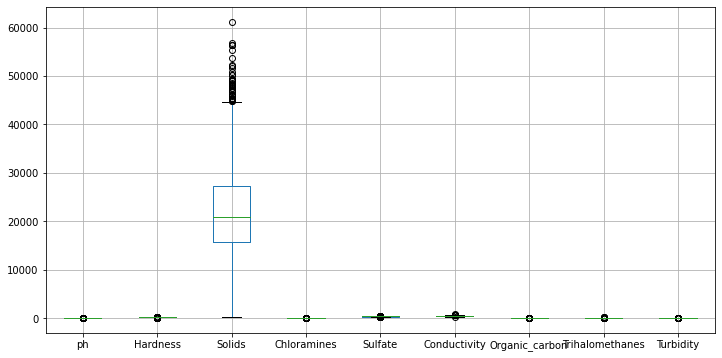

In [54]:
fig, ax = plt.subplots(figsize=(12,6))
df.boxplot(column=[ 'ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity',]) #for only numerical columns plot is drawn
plt.show()

**There are outliers present in the "avg_glucose_level" & "bmi" columns of the given dataset.**

These can be treated by using one of the method called as the **IQR(Inter Quantile Range) method.**

### IQR(Inter Quartile Range)

IQR is a measure of statistical dispersion, which is the spread of the data.

The IQR may also be called the midspread, middle 50%, fourth spread, or H‑spread. 

It is defined as the difference between the 75th and 25th percentiles of the data.

IQR = Q3 − Q1

lower_range =  Q1 - 1.5 * IQR

upper_range = Q3 + 1.5 * IQR 

**Outliers** here are defined as observations that fall below (Q1 − 1.5*IQR) or above (Q3 + 1.5*IQR). 

**Treating the outliers with IQR method.**

In [55]:
#finding the IQR, lower & Upper range of the "avg_glucose_level" & "bmi" columns.
def cal_IQR(x):
    q3,q1 = np.percentile(x, [75 ,25])
    IQR=q3-q1
    lower_range = q1 - 1.5 * IQR
    upper_range = q3 + 1.5 * IQR
    return ("IQR",IQR, "Lower_limit",lower_range, "Upper_limit",upper_range)
#calculate IQR for all columns
result = df[['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity','Organic_carbon', 'Trihalomethanes', 'Turbidity',]].apply(cal_IQR)
print(result)

            ph     Hardness        Solids  Chloramines      Sulfate  \
0          IQR          IQR           IQR          IQR          IQR   
1     1.592377    39.816918   11666.07183     1.987466    33.291119   
2  Lower_limit  Lower_limit   Lower_limit  Lower_limit  Lower_limit   
3     3.889107    117.12516  -1832.417449     3.146221    267.15796   
4  Upper_limit  Upper_limit   Upper_limit  Upper_limit  Upper_limit   
5    10.258615   276.392834  44831.869873    11.096086   400.322434   

  Conductivity Organic_carbon Trihalomethanes    Turbidity  
0          IQR            IQR             IQR          IQR  
1    116.05789        4.49185       20.018954     1.060609  
2  Lower_limit    Lower_limit     Lower_limit  Lower_limit  
3   191.647579       5.328026       26.619225     1.848797  
4  Upper_limit    Upper_limit     Upper_limit  Upper_limit  
5    655.87914      23.295427       106.69504     6.091233  


In [56]:
#removing the rows which are having more than upper range & less than the upper range obtained from the IQR method
df.drop(df[ (df.ph > 10.26) | (df.ph < 3.89)].index , inplace=True)
df.drop(df[ (df.Hardness > 276.4) | (df.Hardness < 117.125)].index , inplace=True)
df.drop(df[ (df. Solids > 44831.87) | (df. Solids <-1832.417)].index , inplace=True)
df.drop(df[ (df.Chloramines > 11.1) | (df.Chloramines < 3.15)].index , inplace=True)
df.drop(df[ (df.Sulfate > 400.322) | (df.Sulfate < 267.16)].index , inplace=True)
df.drop(df[ (df.Conductivity > 655.88) | (df.Conductivity < 191.65)].index , inplace=True)
df.drop(df[ (df.Organic_carbon > 23.3) | (df.Organic_carbon< 5.33)].index , inplace=True)
df.drop(df[ (df.Trihalomethanes > 106.7) | (df.Trihalomethanes < 26.62)].index , inplace=True)

In [58]:
df.shape,dff.shape

((2684, 10), (3276, 10))

# DATA VISUALIZATION

## Count plot

## Correlation plot

**correlation matrix**

1)The correlation matrix is a square matrix which represents the correlation coefficient between two variables.

2)all the diagonal elements are equal to 1, since they represent the correlation of variable with itself.

3)if correlation value is closer to

i) 0: then no/absecne of relation between two variables

ii) 1:strong positive correlation(one varaiable increases other increases)

iii)-1:strong negative correlation(if any one varaiable increases other decreases)

4) the darker shades of colour indicates smaller value(or less corelation) and the lighter shades indicates the larger/highest value(or high corelation).

In [69]:
df.corr()

ph  Hardness    Solids  Chloramines   Sulfate  \
ph               1.000000  0.131891 -0.086815    -0.061532  0.015798   
Hardness         0.131891  1.000000 -0.045790    -0.032966 -0.027848   
Solids          -0.086815 -0.045790  1.000000    -0.038062 -0.112651   
Chloramines     -0.061532 -0.032966 -0.038062     1.000000  0.020869   
Sulfate          0.015798 -0.027848 -0.112651     0.020869  1.000000   
Conductivity     0.001546 -0.031183  0.006517    -0.016452 -0.004604   
Organic_carbon   0.026096  0.011643  0.024487    -0.006230 -0.003902   
Trihalomethanes  0.010307 -0.006186 -0.024750     0.016154 -0.021956   
Turbidity       -0.038057 -0.018776  0.015698    -0.009562 -0.016154   
Potability      -0.005993 -0.002308  0.004916     0.015252 -0.006192   

                 Conductivity  Organic_carbon  Trihalomethanes  Turbidity  \
ph                   0.001546        0.026096         0.010307  -0.038057   
Hardness            -0.031183        0.011643        -0.006186  -0.018776   
Solids               0.006517        0.024487        -0.024750   0.015698   
Chloramines         -0.016452       -0.006230         0.016154  -0.009562   
Sulfate             -0.004604       -0.003902        -0.021956  -0.016154   
Conductivity         1.000000        0.007142        -0.000580   0.010919   
Organic_carbon       0.007142        1.000000         0.003121  -0.012297   
Trihalomethanes     -0.000580        0.003121         1.000000  -0.010893   
Turbidity            0.010919       -0.012297        -0.010893   1.000000   
Potability          -0.003451       -0.032074         0.010089   0.002528   

                 Potability  
ph                -0.005993  
Hardness          -0.002308  
Solids             0.004916  
Chloramines        0.015252  
Sulfate           -0.006192  
Conductivity      -0.003451  
Organic_carbon    -0.032074  
Trihalomethanes    0.010089  
Turbidity          0.002528  
Potability         1.000000

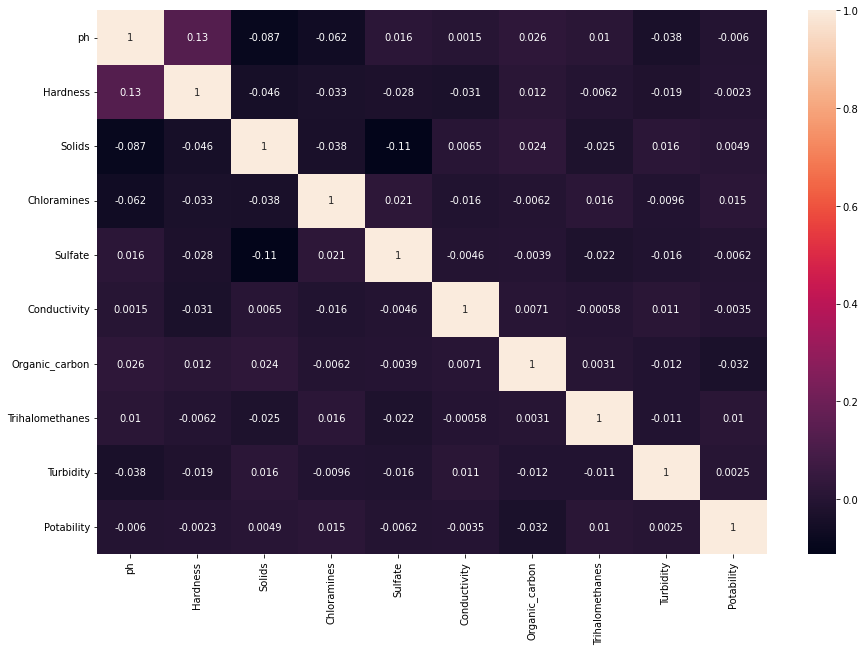

In [61]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

## Pair Plot

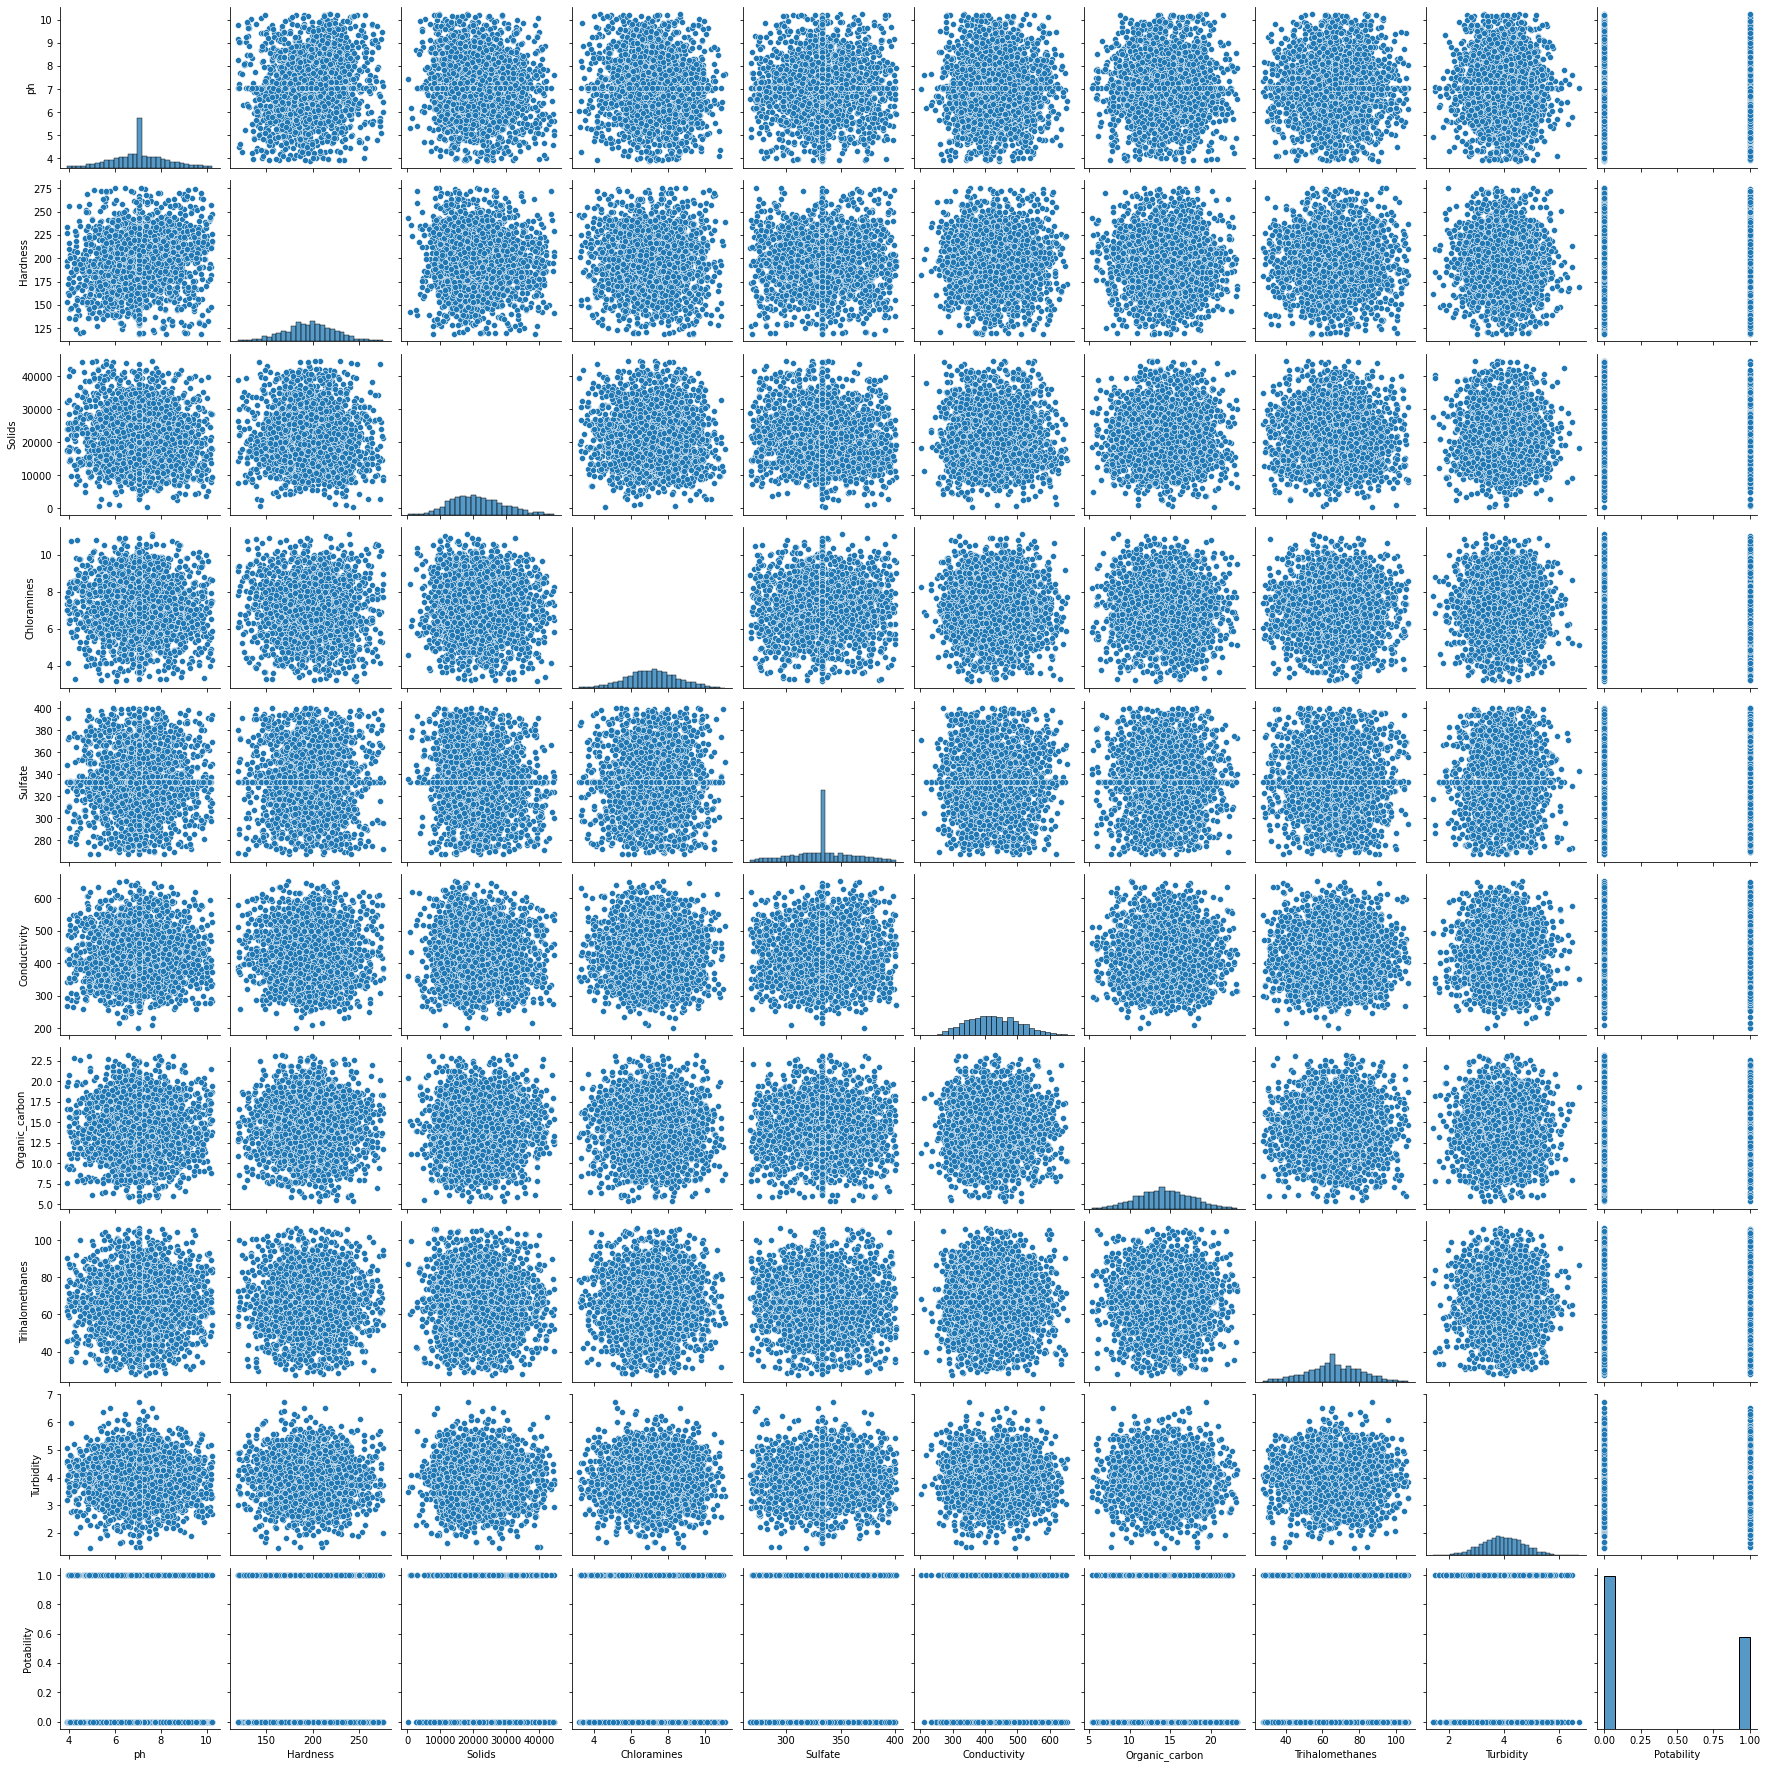

In [62]:
sns.pairplot(df)

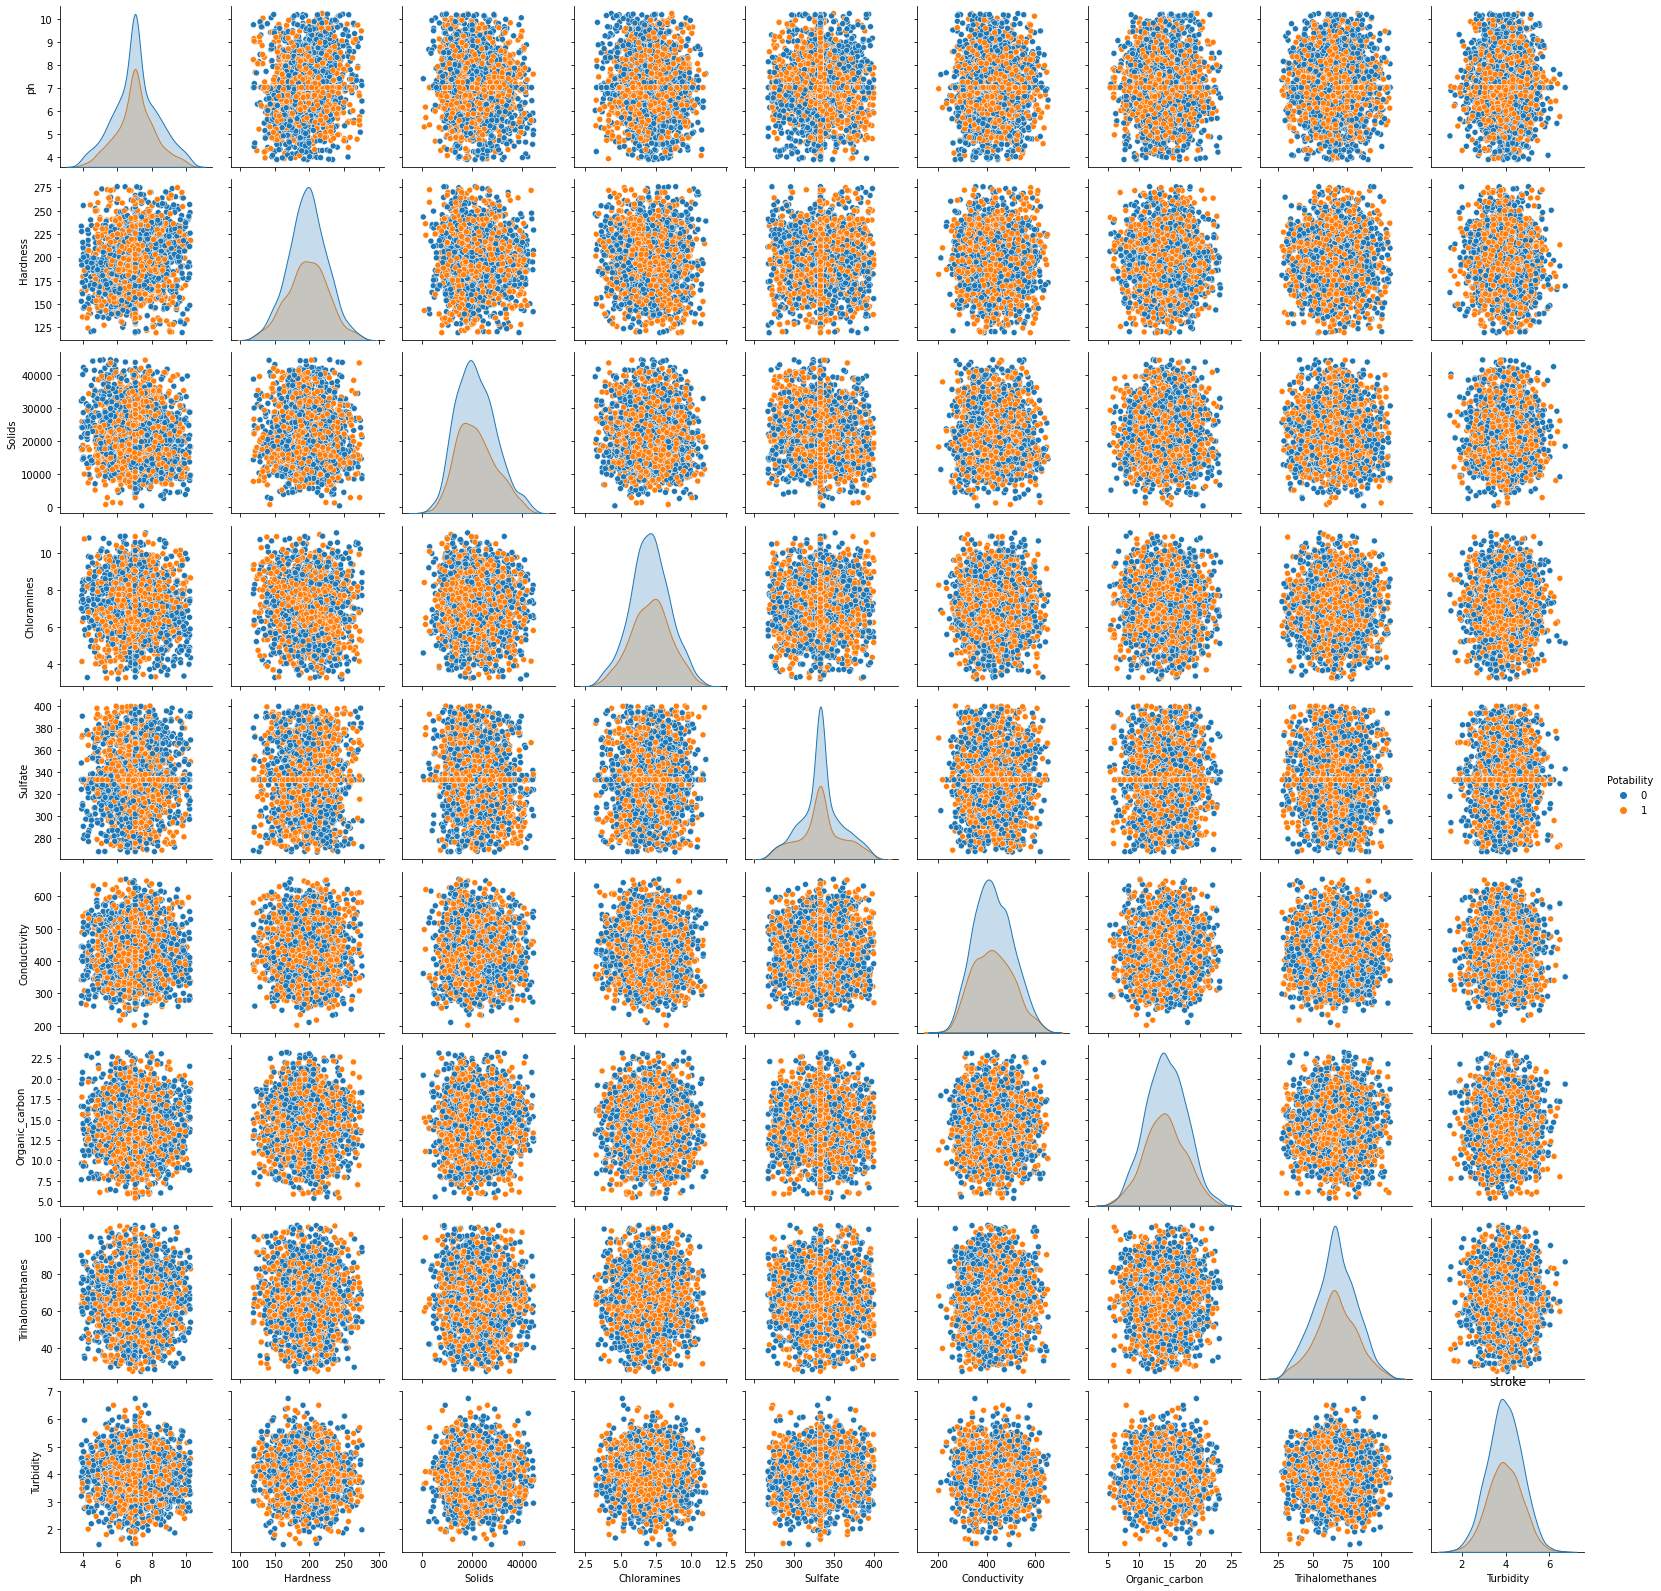

In [63]:
sns.pairplot(df, hue="Potability");
plt.title("stroke");

array([[<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>]], dtype=object)

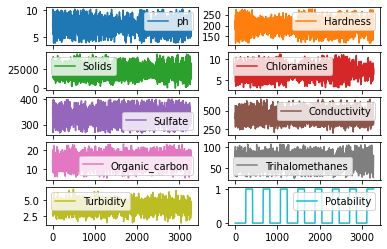

In [67]:
#Pandas subplots=True will arange the axes in a single column.

df.plot(subplots=True,layout=(5,2))

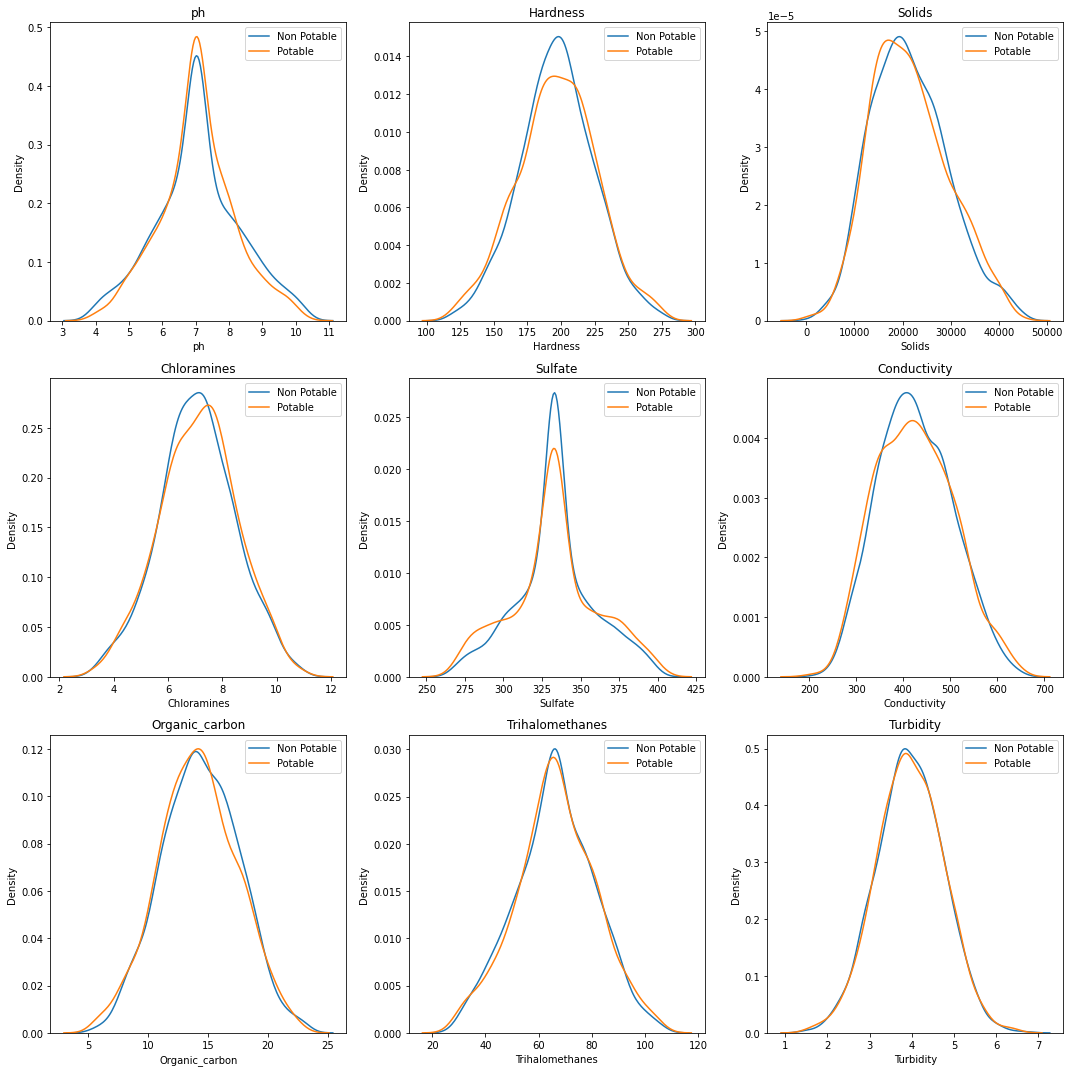

In [70]:
non_potable = df.query("Potability == 0")
potable = df.query("Potability == 1")

plt.figure(figsize = (15,15))
for ax, col in  enumerate(df.columns[:9]):
    plt.subplot(3,3, ax+1)
    plt.title(col)
    sns.kdeplot(x = non_potable[col], label = "Non Potable")
    sns.kdeplot(x = potable[col], label = "Potable")
    plt.legend()
plt.tight_layout()

## FEATURE ENGINEERING

In [79]:
 df["Potability"].value_counts()

0    1680
1    1004
Name: Potability, dtype: int64

The data is imbalanced data. so there is a need to balance the data.

The main objective of balancing classes is to either increasing the frequency of the minority class or decreasing the frequency of the majority class. 

### SMOTE (Synthetic Minority Oversampling Technique)
it is a machine learning technique that is used for the imbalanced data set.

it is a powerful solution for imbalanced data in classification problems.

#### UnderSampling technique
-The most straightforward method to counteract class imbalance is undersampling.

-**Undersampling** means that you discard a number of data points of the class that is present too often. 

-The disadvantage that we need to delete a large amount of data.

#### Over-sampling technique
-Oversampling is the opposite of undersampling.

-**Oversampling** means making duplicates of the data that is the least present in your data set.

-Then add those duplicates to your data set. 

-There will be no information loss but  introducing false information into your model.

#### Data Augmentation
-Data Augmentation is a method that works much like oversampling.

-Rather than making exact duplicates of observations in the less/least present class, you will add small changes to the data points & to generate new data points.

-Data augmentation is useful to improve the performance and outcomes of machine learning models by forming new and different examples to train datasets.

# Splitting the data

In [80]:
from sklearn.model_selection import train_test_split
x = df.drop("Potability", axis = 1).values
y = df["Potability"].values

### SMOTE analysis

We can clearly see that there is a class imbalance problem here as there are 4860 cases of stroke but only 249 cases of no-stroke. We’ll use SMOTE to handle this class imbalance. 

Synthetic Minority Oversampling Technique (SMOTE) works by randomly picking a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.

SMOTE algorithm works in 4 simple steps:

1)Choose a minority class as the input vector
2)Find its k nearest neighbors (k_neighbors is specified as an argument in the SMOTE() function)
3)Choose one of these neighbors and place a synthetic point anywhere on the line joining the point under consideration and its chosen neighbor
4)Repeat the steps until data is balanced

In [73]:
pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [74]:
from imblearn.over_sampling import SMOTE
s=SMOTE()
x_data,y_data=s.fit_resample(x,y)

In [85]:
 x_data.shape,y_data.shape,x.shape,y.shape

((3360, 9), (3360,), (2684, 9), (2684,))

# Standerd Scalar

**Feature Scaling or Standardization**: 

It is applied to independent variables or features of data. 

It helps to normalize the data within a particular range. 

Sometimes, it also helps in speeding up the calculations in an algorithm.

In standerd scaler:  mean is 0 and standerd deviation is 1

**x_scaled(z)=x-mean/std.dev**

In [91]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_scaled=ss.fit_transform(x_data)

In [92]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y_data,test_size=0.3, random_state=33)

In [93]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report,accuracy_score, f1_score,mean_squared_error
import math

## LogisticRegression

In [94]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train) #building training model
y_pred_lor=lr.predict(x_test) #
confusion_matrix=metrics.confusion_matrix(y_test, y_pred_lor)
print('\n CONFUSION MATRIX:\n ', confusion_matrix,'\n')
print('The accuracy for Logistic Regression is ',metrics.accuracy_score(y_pred_lor,y_test)*100)
print('\n CLASSIFICATION REPORT: \n',classification_report(y_test,y_pred_lor))


 CONFUSION MATRIX:
  [[246 259]
 [242 261]] 

The accuracy for Logistic Regression is  50.297619047619044

 CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           0       0.50      0.49      0.50       505
           1       0.50      0.52      0.51       503

    accuracy                           0.50      1008
   macro avg       0.50      0.50      0.50      1008
weighted avg       0.50      0.50      0.50      1008



## RandomForestClassifier

In [95]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier( max_depth= 9, max_features= 1,
                           min_samples_leaf= 3, min_samples_split= 10,
                           n_estimators= 300, random_state=33)
rf.fit(x_train, y_train)
y_pred_rf=rf.predict(x_test)
confusion_matrix=metrics.confusion_matrix(y_test, y_pred_rf)
print('\n CONFUSION MATRIX:\n ', confusion_matrix,'\n')
print('The accuracy for RandomForestClassifier is ',metrics.accuracy_score(y_pred_rf,y_test)*100)
print('\n CLASSIFICATION REPORT: \n',classification_report(y_test,y_pred_rf))


 CONFUSION MATRIX:
  [[282 223]
 [160 343]] 

The accuracy for RandomForestClassifier is  62.00396825396825

 CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           0       0.64      0.56      0.60       505
           1       0.61      0.68      0.64       503

    accuracy                           0.62      1008
   macro avg       0.62      0.62      0.62      1008
weighted avg       0.62      0.62      0.62      1008



##  KNeighborsClassifier

In [96]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3,leaf_size=25)
knn.fit(x_train, y_train)
y_pred_knn=knn.predict(x_test)
confusion_matrix=metrics.confusion_matrix(y_test, y_pred_knn)
print('\n CONFUSION MATRIX:\n ', confusion_matrix,'\n')
print('The accuracy for KNeighborsClassifier is ',metrics.accuracy_score(y_pred_knn,y_test)*100)
print('\n CLASSIFICATION REPORT: \n',classification_report(y_test,y_pred_knn))


 CONFUSION MATRIX:
  [[274 231]
 [166 337]] 

The accuracy for KNeighborsClassifier is  60.61507936507936

 CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           0       0.62      0.54      0.58       505
           1       0.59      0.67      0.63       503

    accuracy                           0.61      1008
   macro avg       0.61      0.61      0.60      1008
weighted avg       0.61      0.61      0.60      1008



## Navie Bayes

In [97]:
from sklearn.naive_bayes import GaussianNB
na=GaussianNB()
na.fit(x_train,y_train)
y_pred_na=na.predict(x_test)
confusion_matrix=metrics.confusion_matrix(y_test, y_pred_na)
print('\n CONFUSION MATRIX:\n ', confusion_matrix,'\n')
print('The accuracy for GaussianNB is ',metrics.accuracy_score(y_pred_na,y_test)*100)
print('\n CLASSIFICATION REPORT: \n',classification_report(y_test,y_pred_na))


 CONFUSION MATRIX:
  [[219 286]
 [159 344]] 

The accuracy for GaussianNB is  55.85317460317461

 CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           0       0.58      0.43      0.50       505
           1       0.55      0.68      0.61       503

    accuracy                           0.56      1008
   macro avg       0.56      0.56      0.55      1008
weighted avg       0.56      0.56      0.55      1008



## Decision Tree

In [98]:
from sklearn.tree import DecisionTreeClassifier

dt= DecisionTreeClassifier(random_state=42)
dt.fit(x_train, y_train)
y_pred_dt=dt.predict(x_test)
confusion_matrix=metrics.confusion_matrix(y_test, y_pred_dt)
print('\n CONFUSION MATRIX:\n ', confusion_matrix,'\n')
print('The accuracy for DecisionTreeClassifier is ',metrics.accuracy_score(y_pred_dt,y_test)*100)
print('\n CLASSIFICATION REPORT: \n',classification_report(y_test,y_pred_dt))


 CONFUSION MATRIX:
  [[272 233]
 [193 310]] 

The accuracy for DecisionTreeClassifier is  57.738095238095234

 CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           0       0.58      0.54      0.56       505
           1       0.57      0.62      0.59       503

    accuracy                           0.58      1008
   macro avg       0.58      0.58      0.58      1008
weighted avg       0.58      0.58      0.58      1008



# **MODEL EVALUATION**

In [99]:
#Final Result Comperison
data = {'Logistic Regression':[metrics.accuracy_score(y_pred_lor,y_test)*100],
    'RandomForestClassifier':[metrics.accuracy_score(y_pred_rf,y_test)*100],
    'KNeighborsClassifier':[metrics.accuracy_score(y_pred_knn,y_test)*100],
    'GaussianNB ':[metrics.accuracy_score(y_pred_na,y_test)*100],
    'DecisionTreeClassifier ': [metrics.accuracy_score(y_pred_dt,y_test)*100]}

df_result=pd.DataFrame(data,index=["Accuracy"]).T
df_result

Accuracy
Logistic Regression      50.297619
RandomForestClassifier   62.003968
KNeighborsClassifier     60.615079
GaussianNB               55.853175
DecisionTreeClassifier   57.738095

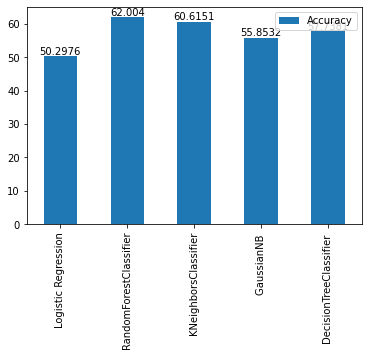

In [103]:
ax = df_result.plot.bar()
for container in ax.containers:
    ax.bar_label(container)

the randomforest has given better accuracy compared to other algotithums.